In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
%matplotlib inline

In [3]:
apartments_data = pd.read_csv('raw_apartments_data.csv', encoding='cp1251')

In [4]:
apartments_data

,photo,date,type,district,address,floor,square_all,square_living,square_kitchen,comment,price (thousand rubles),phone,agency,email
0,NaN,08.0816:35,Двухкомнатная,Орджоникидзевский,Ленина пр-т 129,2/16,72.0,33.0,14.0,id:5662. Продам шикарную двухкомнатную кварти...,6200,79514555553 ... Елена Стрюкова,РиоЛюкс,stryukova.riolux@gmail.com
1,NaN,08.0816:34,Двухкомнатная,NaN,Российская 7,2/2,45.0,31.0,6.0,id:4333. Продам двухкомнатную квартиру в п. С...,500,79514555553 ... Елена Стрюкова,РиоЛюкс,stryukova.riolux@gmail.com
2,NaN,08.0812:13,Двухкомнатная старой планировки,Ленинский,Герцена 33,1/2,68.5,45.0,15.0,"Дом рядом с Джазз Моллом (угловой), окна с дву...",3330,89030918778 ... Роман,NaN,NaN
3,NaN,08.0807:19,Двухкомнатная раздельная,Правобережный,"Им. газеты ""Правда"" 31",5/5,46.0,29.0,6.0,Состояние отличное. Ремонт. Остается мебель! Ч...,3250,8-912-891-11-11 ... Андоськин Андрей,МАГНИТОГОРСК НЕДВИЖИМОСТЬ,NaN
4,NaN,07.0818:46,Трехкомнатная,Правобережный,Суворова 140,4/5,60.2,48.0,6.0,В продаже 3х комнатная квартира на 4 этаже в б...,3850,89630967453 ... Мухамедзянова Лариса Гадильевна,Агентство Недвижимости Ключи,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,NaN,08.0819:09,Трехкомнатная нестандартная,Ленинский,Николая Шишка 22,5/5,74.0,56.0,9.0,Объявление актуально. Продам трёх комнатную кв...,5500,8-963-478-43-08 ... Ведякина Люцина,Формула недвижимости,8 982 105 20 21
519,NaN,12.0518:36,Двухкомнатная,NaN,Молодежная 19А,1/5,41.0,22.2,7.2,"ПPОДАЁТCЯ 2 К.КВ., ПО АДРEСУ село Шухободь, ул...",930,+79115050320 ... Григорий Голубев,NaN,600-320@mail.ru
520,NaN,01.0617:01,Двухкомнатная хрущевка,Правобережный,"Им. газеты ""Правда"" 22",5/5,42.5,29.0,6.0,"Продам 2х комнатную ""хрущевку"" в хорошем состо...",2650,89630958889 ... Макаров Юрий Александрович,""" СИГМА """,NaN
521,NaN,08.0818:50,Двухкомнатная улучшенная,Орджоникидзевский,Сиреневый проезд 10,3/9,50.0,30.0,9.0,Продам двухкомнатную улучшенной планировки не ...,3350,"8-908-818-12-40, 49-17-15 ... Мещерякова Елена...",Новые Технологии,nedv_elen@mail.ru


# Очистка данных и выделение признаков

## Первичная обработка

In [5]:
# Дропаем точно ненужные колонки
apartments_data = apartments_data.drop(['photo', 'phone', 'email'], axis=1)

## Дата

In [6]:
# Преобразуем дату в месяц
apartments_data['date'] = apartments_data['date'].apply(lambda x: int(x[3:5]))
apartments_data = apartments_data.rename(columns={'date': 'date_month'})

In [7]:
apartments_data.head()

,date_month,type,district,address,floor,square_all,square_living,square_kitchen,comment,price (thousand rubles),agency
0,8,Двухкомнатная,Орджоникидзевский,Ленина пр-т 129,2/16,72.0,33.0,14.0,id:5662. Продам шикарную двухкомнатную кварти...,6200,РиоЛюкс
1,8,Двухкомнатная,NaN,Российская 7,2/2,45.0,31.0,6.0,id:4333. Продам двухкомнатную квартиру в п. С...,500,РиоЛюкс
2,8,Двухкомнатная старой планировки,Ленинский,Герцена 33,1/2,68.5,45.0,15.0,"Дом рядом с Джазз Моллом (угловой), окна с дву...",3330,NaN
3,8,Двухкомнатная раздельная,Правобережный,"Им. газеты ""Правда"" 31",5/5,46.0,29.0,6.0,Состояние отличное. Ремонт. Остается мебель! Ч...,3250,МАГНИТОГОРСК НЕДВИЖИМОСТЬ
4,8,Трехкомнатная,Правобережный,Суворова 140,4/5,60.2,48.0,6.0,В продаже 3х комнатная квартира на 4 этаже в б...,3850,Агентство Недвижимости Ключи


## Тип квартиры

In [8]:
# Оставляем в поле type только кол-во комнат в квартире и переименовываем в rooms
# Выяснилось, что при разделении признака type на 2 новых, во втором признаке около 70% пропусков
apartments_data['type'] = apartments_data['type'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else x)

apartments_data = apartments_data.rename(columns={'type': 'rooms'})

In [9]:
apartments_data['rooms'].unique()

array(['Двухкомнатная', 'Трехкомнатная', nan, 'Однокомнатная',
       'Четырехкомнатная', 'Многокомнатная'], dtype=object)

In [10]:
multiple_rooms = len(apartments_data[apartments_data['rooms'] == 'Многокомнатная'])
nan_rooms = len(apartments_data[apartments_data['rooms'].isna()])
print(f'Кол-во многокомнатных квартир: {multiple_rooms}\nКол-во квартир с nan комнат: {nan_rooms}')

Кол-во многокомнатных квартир: 9
Кол-во квартир с nan комнат: 7


In [11]:
# Смотрим типы комнат, которые незаполнены или заполнены неопределенно ('Многокомнатная')
apartments_data[apartments_data['rooms'].isna() | (apartments_data['rooms'] == 'Многокомнатная')].loc[:, ['comment', 'rooms']]

,comment,rooms
9,id:5926. Продам студию с выделенной кухней в ...,NaN
41,id:5892. Предлогам Вашему вниманию интересно...,NaN
66,id:5867. ВНИМАНИЕ! ЭКСКЛЮЗИВНОЕ ПРЕДЛОЖЕНИЕ Р...,NaN
73,id:5856. ВНИМАНИЕ! ЭКСКЛЮЗИВНОЕ ПРЕДЛОЖЕНИЕ Р...,Многокомнатная
112,id:4020. Продажа квартиры-студии в жилом комп...,NaN
228,id:5409. Недвижимость может стать не только в...,NaN
275,id:4922. Отличный вариант для большой и дружн...,Многокомнатная
290,id:4863. Продам замечательную смежную 2-х ком...,NaN
332,Продам пятикомнатную квартиру в центре левого...,Многокомнатная
374,id:4364. Продам 2-ую квартиру в районе Золото...,Многокомнатная


In [12]:
# Т.к. кол-во квартир с неопределенным кол-вом комнат небольшое, зададим их вручную, ориентируясь по описанию
rooms_dic = {
    9: 'Студия',
    41: 'Дроп',
    66: 'Двухкомнатная',
    73: 'Дроп',
    112: 'Студия',
    228: 'Однокомнатная',
    275: 'Трехкомнатная',
    290: 'Двухкомнатная',
    332: 'Дроп',
    374: 'Двухкомнатная',
    396: 'Дроп',
    406: 'Дроп',
    423: 'Дроп',
    457: 'Студия',
    495: 'Дроп',
    501: 'Дроп'
}

In [13]:
# Применяем словарь и удаляем лишние строки
for i, v in rooms_dic.items():
    apartments_data.loc[i, 'rooms'] = v

drop_rows = apartments_data[apartments_data['rooms'] == 'Дроп'].index
apartments_data = apartments_data.drop(drop_rows)
apartments_data = apartments_data.reset_index(drop=True)

In [14]:
# Применяем Label Encoding
apartments_data['rooms'] = apartments_data['rooms'].replace({'Студия': 0,
                                                             'Однокомнатная': 1,
                                                             'Двухкомнатная': 2,
                                                             'Трехкомнатная': 3,
                                                             'Четырехкомнатная': 4})

## Адрес

In [15]:
# Убираем номер дома для каждого адреса
apartments_data['address'] = apartments_data['address'].apply(lambda x: ' '.join(x.split(' ')[:-1]) if isinstance(x, str) else x)

In [16]:
apartments_data['address'].unique()

array(['Ленина пр-т', 'Российская', 'Герцена', 'Им. газеты "Правда"',
       'Суворова', 'Набережная', 'Грязнова', 'Карла Маркса',
       'Зеленый Лог', 'Коробова', 'Московская', '50-летия Магнитки',
       'Менделеева', 'ул Первомайская', 'Советская', 'Металлургов',
       'Ворошилова', '', 'ул. имени газеты Правда', 'Советской Армии',
       'ул. Школьная', 'Болотная', 'Завенягина', 'Пекинская', 'Бурденко ',
       'Труда', 'ул Завенягина', 'Западное шоссе', 'Жукова',
       'ул. Феодосия Воронова', 'Вокзальная', 'Галиуллина', 'Сталеваров',
       'Первомайская', 'Бориса Ручьева', 'Зеленый лог', 'ул Чекалина',
       'ул Ломоносова', 'Доменщиков', 'Володарского', 'ул Лермонтова',
       'Фадеева', 'Феодосия Воронова', 'ул Писарева', nan,
       'ул. Курортная', '5/2 ул.', 'Тарасенко', 'Чапаева', 'Октябрьская',
       'ул Жукова', 'ул Черемушки', 'ул Грязнова', 'Тевосяна',
       'Молодежный Зеленый лог,', 'Новая', 'Корсикова', 'карла маркса',
       'уральская', 'зеленый лог', 'Строи

In [17]:
# Хотя для большинства адресов предыдущая функция сработала,
# Некоторые адреса выбивались из общего формата и были неверно обработаны
# Восстановим эти адреса
address_dic = {
    23: 'Карла Маркса',
    25: 'Им. газеты "Правда"',
    80: 'Ленина пр-т',
    81: 'Ленина пр-т',
    83: 'Торфяная',
    112: 'Карла Маркса',
    121: 'Им. газеты "Правда"',
    140: 'Горнолыжная',
    162: 'Карла Маркса',
    177: 'Ленина пр-т',
    183: 'Дроп',
    185: 'Труда',
    267: 'Им. газеты "Правда"',
    302: 'Подольская',
    378: 'Дроп',
    384: 'Дроп',
    388: 'Набережная',
    433: 'Дроп',
    475: 'Дроп',
    489: 'Ленина пр-т',
    509: 'Ленина пр-т'
}

In [18]:
# Применяем словарь и удаляем лишние строки
for i, v in address_dic.items():
    apartments_data.loc[i, 'address'] = v

drop_rows = apartments_data[apartments_data['address'] == 'Дроп'].index
apartments_data = apartments_data.drop(drop_rows)
apartments_data = apartments_data.reset_index(drop=True)

In [19]:
apartments_data['address'].unique()

array(['Ленина пр-т', 'Российская', 'Герцена', 'Им. газеты "Правда"',
       'Суворова', 'Набережная', 'Грязнова', 'Карла Маркса',
       'Зеленый Лог', 'Коробова', 'Московская', '50-летия Магнитки',
       'Менделеева', 'ул Первомайская', 'Советская', 'Металлургов',
       'Ворошилова', 'Советской Армии', 'ул. Школьная', 'Болотная',
       'Завенягина', 'Пекинская', 'Бурденко ', 'Труда', 'ул Завенягина',
       'Западное шоссе', 'Жукова', 'ул. Феодосия Воронова', 'Вокзальная',
       'Галиуллина', 'Сталеваров', 'Первомайская', 'Бориса Ручьева',
       'Зеленый лог', 'ул Чекалина', 'ул Ломоносова', 'Доменщиков',
       'Володарского', 'ул Лермонтова', 'Фадеева', 'Феодосия Воронова',
       'ул Писарева', 'ул. Курортная', 'Торфяная', 'Тарасенко', 'Чапаева',
       'Октябрьская', 'ул Жукова', 'ул Черемушки', 'ул Грязнова',
       'Тевосяна', 'Молодежный Зеленый лог,', 'Новая', 'Корсикова',
       'уральская', 'зеленый лог', 'Строителей', 'Центральная',
       'Сиреневый проезд', 'Паньков

In [20]:
# Удаляем из названий улиц 'ул.'
apartments_data['address'] = apartments_data['address'].apply(lambda x: re.sub(r'ул\.?\s?', '', x))

In [21]:
len(apartments_data['address'].unique())

103

In [22]:
apartments_data['address'].unique()

array(['Ленина пр-т', 'Российская', 'Герцена', 'Им. газеты "Правда"',
       'Суворова', 'Набережная', 'Грязнова', 'Карла Маркса',
       'Зеленый Лог', 'Коробова', 'Московская', '50-летия Магнитки',
       'Менделеева', 'Первомайская', 'Советская', 'Металлургов',
       'Ворошилова', 'Советской Армии', 'Школьная', 'Болотная',
       'Завенягина', 'Пекинская', 'Бурденко ', 'Труда', 'Западное шоссе',
       'Жукова', 'Феодосия Воронова', 'Вокзальная', 'Галилина',
       'Сталеваров', 'Бориса Ручьева', 'Зеленый лог', 'Чекалина',
       'Ломоносова', 'Доменщиков', 'Володарского', 'Лермонтова',
       'Фадеева', 'Писарева', 'Курортная', 'Торфяная', 'Тарасенко',
       'Чапаева', 'Октябрьская', 'Черемушки', 'Тевосяна',
       'Молодежный Зеленый лог,', 'Новая', 'Корсикова', 'уральская',
       'зеленый лог', 'Строителей', 'Центральная', 'Сиреневый проезд',
       'Панькова', 'Николая Шишка', 'Комсомольская', 'Горнолыжная',
       'Чайковского', 'Казакова', 'Гагарина', 'Уральская', 'Помяловс

### Категории улиц

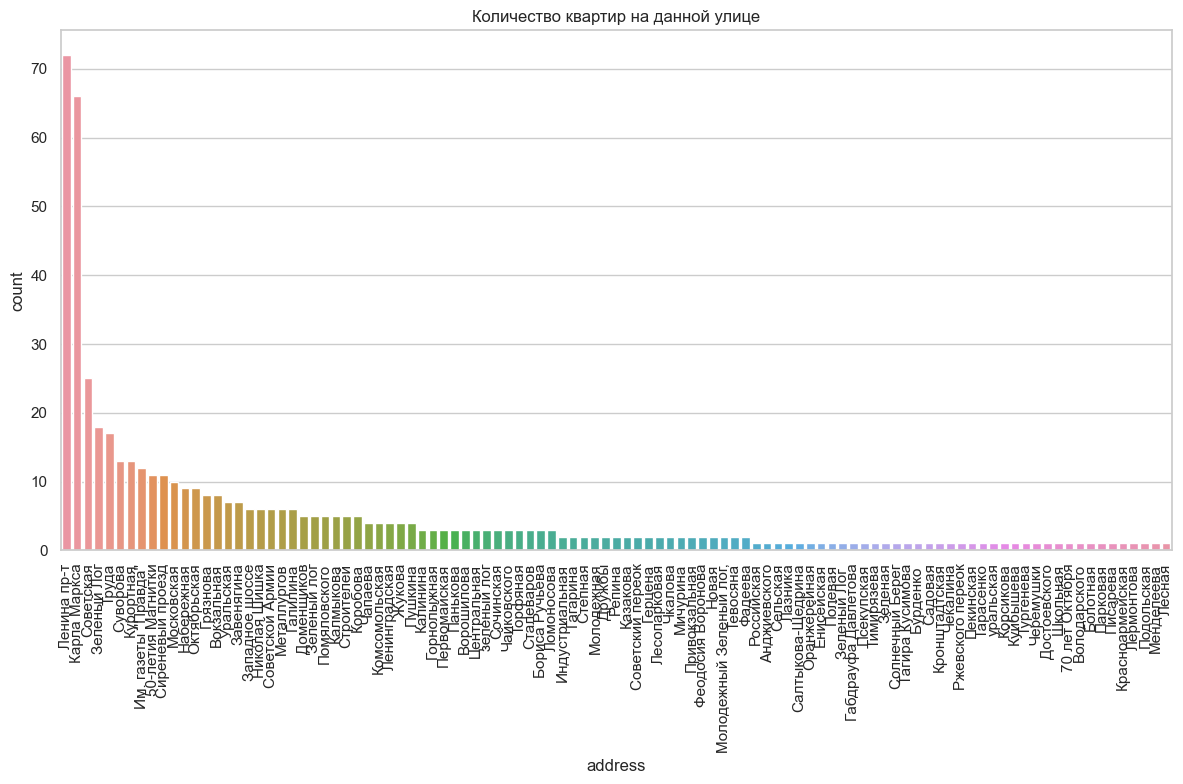

In [23]:
plt.figure(figsize=(12, 8))

sns.set(style='whitegrid')
plt.title('Количество квартир на данной улице')

sns.countplot(x='address', data=apartments_data, order=apartments_data['address'].value_counts().index)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Выделим 3 категории: 'Ленина пр-т', 'Карла Маркса' и все остальные. Закодируем их с помощью One Hot Encoding

In [24]:
def set_street_category(street):
    if street == 'Ленина пр-т':
        return 'Lenina'
    elif street == 'Карла Маркса':
        return 'Marksa'
    else:
        return 'another'

In [25]:
# Создаем новые поля
apartments_data['street_cat'] = apartments_data['address'].apply(set_street_category)
streets_encoded = pd.get_dummies(apartments_data['street_cat'], prefix='street')
apartments_data = pd.concat([apartments_data, streets_encoded], axis=1)

In [26]:
# Удаляем ненужные поля
apartments_data = apartments_data.drop(['street_cat'], axis=1)

In [27]:
apartments_data.head()

,date_month,rooms,district,address,floor,square_all,square_living,square_kitchen,comment,price (thousand rubles),agency,street_Lenina,street_Marksa,street_another
0,8,2,Орджоникидзевский,Ленина пр-т,2/16,72.0,33.0,14.0,id:5662. Продам шикарную двухкомнатную кварти...,6200,РиоЛюкс,True,False,False
1,8,2,NaN,Российская,2/2,45.0,31.0,6.0,id:4333. Продам двухкомнатную квартиру в п. С...,500,РиоЛюкс,False,False,True
2,8,2,Ленинский,Герцена,1/2,68.5,45.0,15.0,"Дом рядом с Джазз Моллом (угловой), окна с дву...",3330,NaN,False,False,True
3,8,2,Правобережный,"Им. газеты ""Правда""",5/5,46.0,29.0,6.0,Состояние отличное. Ремонт. Остается мебель! Ч...,3250,МАГНИТОГОРСК НЕДВИЖИМОСТЬ,False,False,True
4,8,3,Правобережный,Суворова,4/5,60.2,48.0,6.0,В продаже 3х комнатная квартира на 4 этаже в б...,3850,Агентство Недвижимости Ключи,False,False,True


In [28]:
len(apartments_data[apartments_data['street_another'] == True]) / len(apartments_data)

0.7294117647058823

## Район

In [29]:
apartments_data['district'].unique()

array(['Орджоникидзевский', nan, 'Ленинский', 'Правобережный',
       'Орджонекидзевский', 'Орджоникидзевский (левый берег)',
       'Правобережный район', 'П/б', 'Правоббережный', 'правобережный',
       'Ленинский (Левый берег)', 'ленинский', 'орджоникидзевский'],
      dtype=object)

In [30]:
district_dic = {'ленинский': 'Ленинский',
                'Правобережный район': 'Правобережный',
                'правобережный': 'Правобережный',
                'Правоббережный': 'Правобережный',
                'П/б': 'Правобережный',
                'орджоникидзевский': 'Орджоникидзевский',
                'Орджонекидзевский': 'Орджоникидзевский',
                'Ленинский (Левый берег)': 'Ленинский (левый берег)'}

In [31]:
# Применяем словарь для унификации названий районов
apartments_data = apartments_data.replace({'district': district_dic})

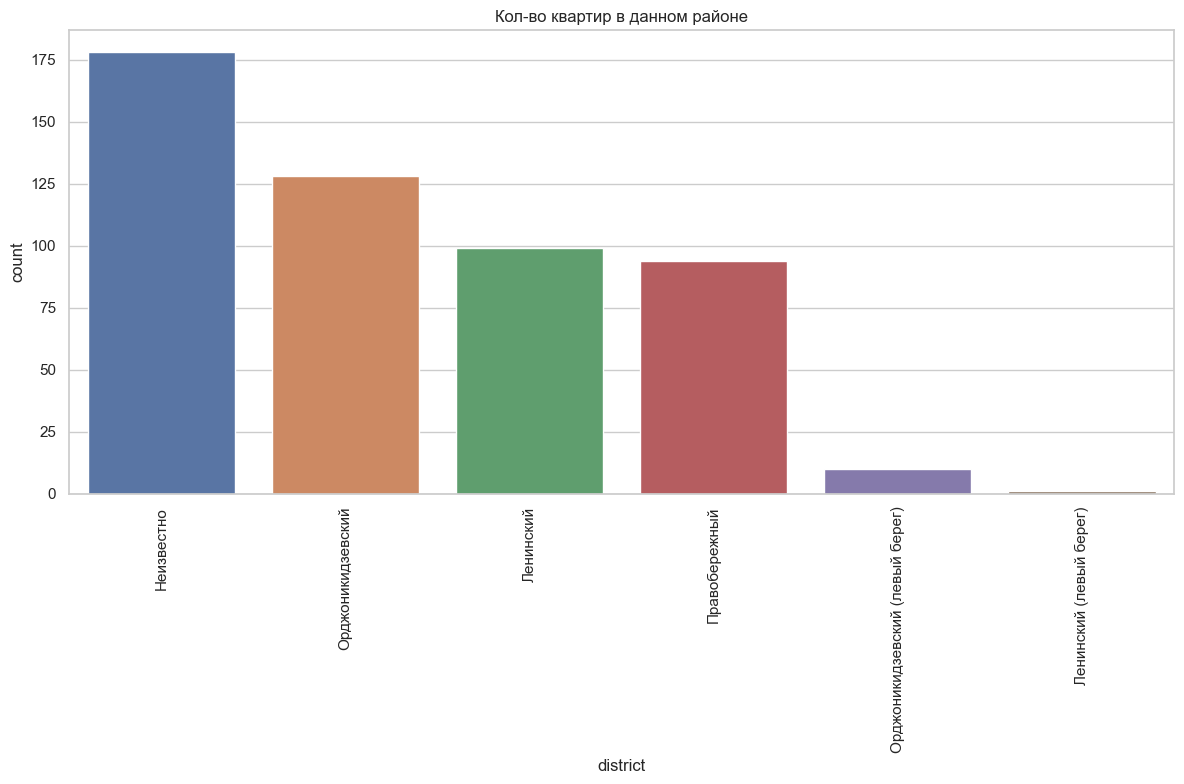

In [32]:
df_district_filled = apartments_data.fillna('Неизвестно')

plt.figure(figsize=(12, 8))

sns.set(style='whitegrid')
plt.title('Кол-во квартир в данном районе')

sns.countplot(x='district', data=df_district_filled, order=df_district_filled['district'].value_counts().index)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Поиск упоминания района в комментарии к объявлению

In [33]:
district_missed_df = apartments_data[apartments_data['district'].isna()].copy()

# При поиске комментариев с упоминание левого берега не нашлось
# Ни одного подходящего района, поэтому л/б не включен в замену
district_patterns = {'Орджоникидзевский': r'[Оо]рдж',
                    'Ленинский': '[Лл]енинск',
                    'Правобережный': '/[Пп]равобб?ер'}

for district, pattern in district_patterns.items():
    indices = []
    for index, row in district_missed_df.iterrows():
        if isinstance(row['comment'], str):
            match = re.search(pattern, row['comment'])
            if match:
                apartments_data.loc[index, 'district'] = district
                indices.append(index)
                
# Этот цикл помог понизить процент пропусков района с 35% до 28.4%
# Причем качество восстановления довольно высокое, притом использовался только regexp

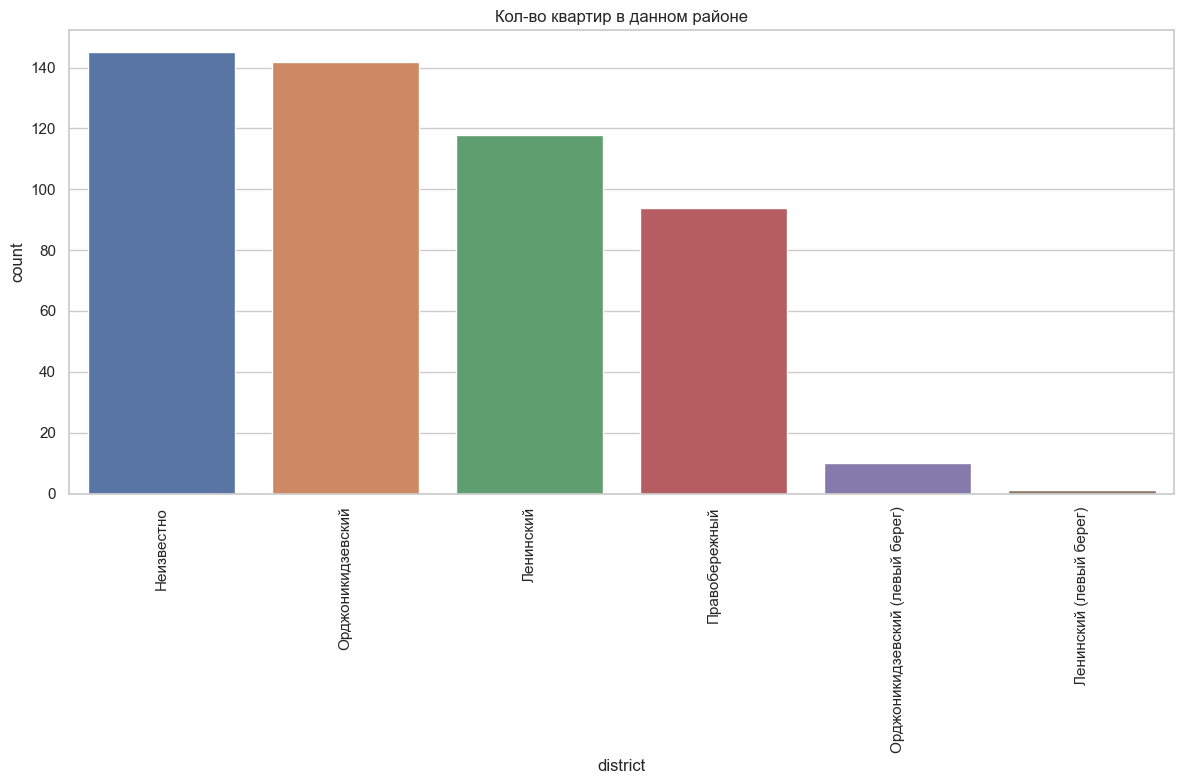

In [34]:
df_district_filled = apartments_data.fillna('Неизвестно')

plt.figure(figsize=(12, 8))

sns.set(style='whitegrid')
plt.title('Кол-во квартир в данном районе')

sns.countplot(x='district', data=df_district_filled, order=df_district_filled['district'].value_counts().index)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [35]:
df_district_filled['district'].unique()

array(['Орджоникидзевский', 'Неизвестно', 'Ленинский', 'Правобережный',
       'Орджоникидзевский (левый берег)', 'Ленинский (левый берег)'],
      dtype=object)

### Сопоставление улиц районам

In [36]:
df_district_filled_grouped = df_district_filled.groupby(['district', 'address']).size().unstack(fill_value=0)

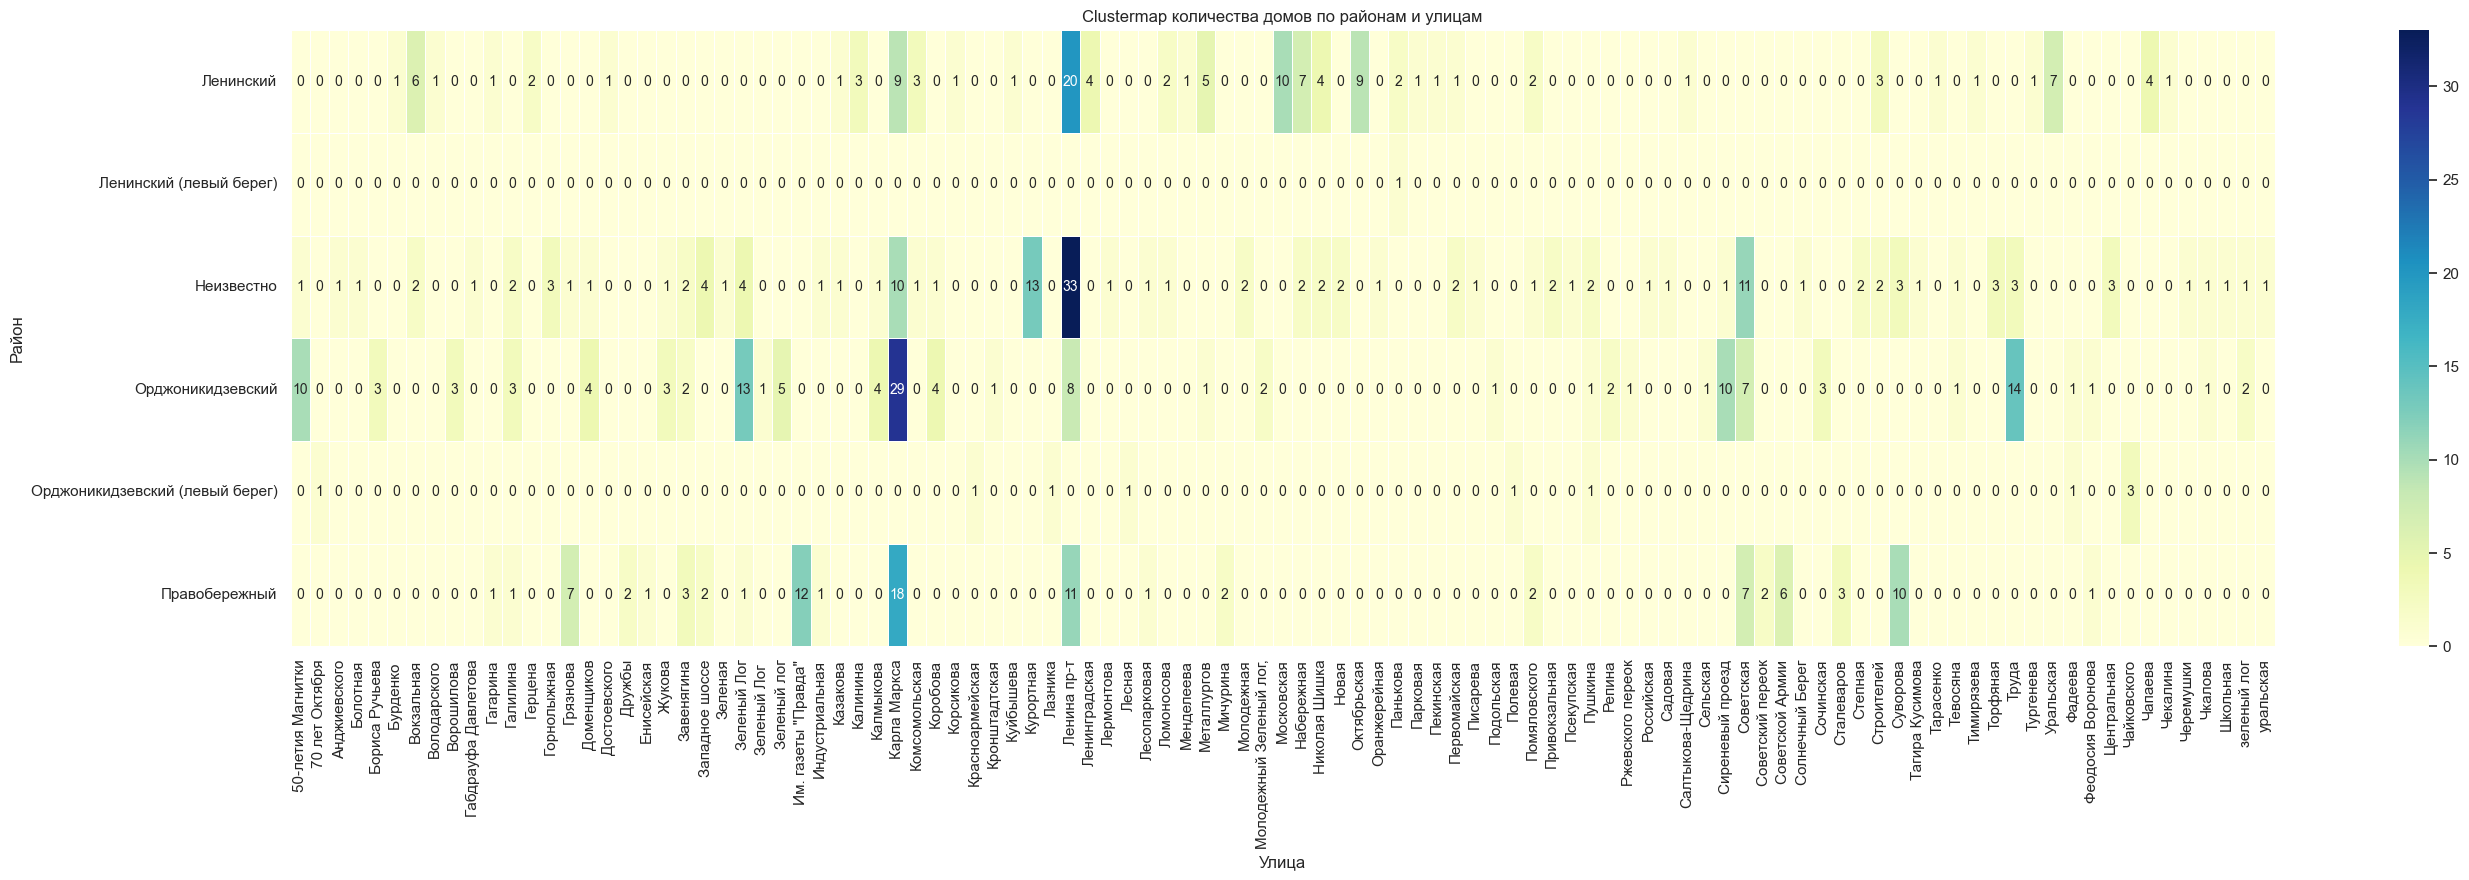

In [37]:
plt.figure(figsize=(32, 8))
sns.heatmap(df_district_filled_grouped,
            cmap='YlGnBu',
            annot=True,
            fmt='d',
            linewidths=0.5,
            annot_kws={'fontsize': 10})

plt.title("Clustermap количества домов по районам и улицам")
plt.xlabel("Улица")
plt.ylabel("Район")

plt.show()

In [38]:
np.sort(apartments_data['address'].unique())

array(['50-летия Магнитки', '70 лет Октября', 'Анджиевского', 'Болотная',
       'Бориса Ручьева', 'Бурденко ', 'Вокзальная', 'Володарского',
       'Ворошилова', 'Габдрауфа Давлетова', 'Гагарина', 'Галилина',
       'Герцена', 'Горнолыжная', 'Грязнова', 'Доменщиков', 'Достоевского',
       'Дружбы', 'Енисейская', 'Жукова', 'Завенягина', 'Западное шоссе',
       'Зеленая', 'Зеленый Лог', 'Зеленый Лог ', 'Зеленый лог',
       'Им. газеты "Правда"', 'Индустриальная', 'Казакова', 'Калинина',
       'Калмыкова', 'Карла Маркса', 'Комсомольская', 'Коробова',
       'Корсикова', 'Красноармейская', 'Кронштадтская', 'Куйбышева',
       'Курортная', 'Лазника', 'Ленина пр-т', 'Ленинградская',
       'Лермонтова', 'Лесная', 'Лесопарковая', 'Ломоносова', 'Менделеева',
       'Металлургов', 'Мичурина', 'Молодежная', 'Молодежный Зеленый лог,',
       'Московская', 'Набережная', 'Николая Шишка', 'Новая',
       'Октябрьская', 'Оранжерейная', 'Панькова', 'Парковая', 'Пекинская',
       'Первомайская', 

In [39]:
# Удаляем квартиры с адресами не в Магнитогорске
# Эти адреса были проверены по heatmap, т.к. не были присвоены никакому району Магнитогорска
addresses_to_drop = ['Анджиевского', 'Болотная', 'Габдрауфа Давлетова', 'Горнолыжная', 'Курортная', 'Молодежная',
                     'Новая', 'Привокзальная', 'Псекупская', 'Российская', 'Садовая', 'Солнечный Берег', 'Степная',
                     'Тагира Кусимова', 'Торфяная', 'Центральная', 'Черемушки', 'Школьная']

drop_rows = apartments_data[apartments_data['address'].isin(addresses_to_drop)].index
apartments_data = apartments_data.drop(drop_rows)
apartments_data = apartments_data.reset_index(drop=True)

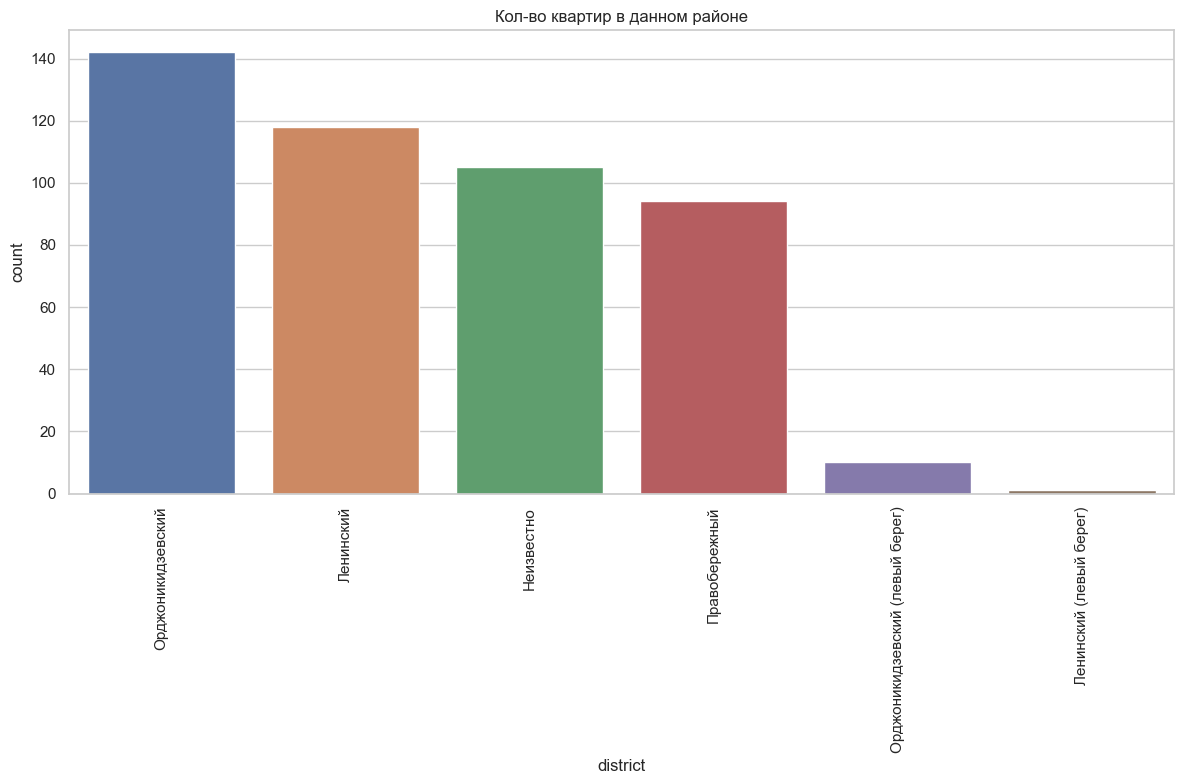

In [40]:
df_district_filled = apartments_data.fillna('Неизвестно')

plt.figure(figsize=(12, 8))

sns.set(style='whitegrid')
plt.title('Кол-во квартир в данном районе')

sns.countplot(x='district', data=df_district_filled, order=df_district_filled['district'].value_counts().index)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Составим датафрейм с сопоставлением района каждой улице, чтобы заполнить этими значениями пропуски

In [41]:
df_address_district = apartments_data.groupby('address')['district'].apply(lambda x: x.mode()).reset_index()
df_address_district.head(10)

,address,level_1,district
0,50-летия Магнитки,0,Орджоникидзевский
1,70 лет Октября,0,Орджоникидзевский (левый берег)
2,Бориса Ручьева,0,Орджоникидзевский
3,Бурденко,0,Ленинский
4,Вокзальная,0,Ленинский
5,Володарского,0,Ленинский
6,Ворошилова,0,Орджоникидзевский
7,Гагарина,0,Ленинский
8,Гагарина,1,Правобережный
9,Галилина,0,Орджоникидзевский


In [42]:
# Отбираем только районы-дубликаты, для которых было несколько мод
# Считаем наиболее популярный район из пары мод, чтобы присвоить его
df_address_district_duplicates = df_address_district[df_address_district.duplicated('address', keep=False)].copy()
df_address_district_duplicates['district_popularity'] = df_address_district_duplicates['district'].map(
    lambda x: len(apartments_data[apartments_data['district'] == x]))
df_address_district_duplicates

,address,level_1,district,district_popularity
7,Гагарина,0,Ленинский,118
8,Гагарина,1,Правобережный,94
54,Помяловского,0,Ленинский,118
55,Помяловского,1,Правобережный,94
56,Пушкина,0,Орджоникидзевский,142
57,Пушкина,1,Орджоникидзевский (левый берег),10
63,Советская,0,Орджоникидзевский,142
64,Советская,1,Правобережный,94
77,Фадеева,0,Орджоникидзевский,142
78,Фадеева,1,Орджоникидзевский (левый берег),10


In [43]:
# Оставляем экземпляры дубликатов с наиболее популярным районом

# Считаем максимальное кол-во вхождений в датасете для районов, сопоставленных дублирующимся улицам
max_popular_districts = df_address_district_duplicates.groupby('address')['district_popularity'].max()

# Добавляем столбец с максимальным кол-вом вхождений района для данной улицы
df_address_district_duplicates = df_address_district_duplicates.merge(
    max_popular_districts, left_on='address', right_index=True, suffixes=('', '_max'))

# Оставляем те строки, для которых кол-во вхождений является максимальным
df_address_district_duplicates = df_address_district_duplicates[df_address_district_duplicates['district_popularity'] == df_address_district_duplicates['district_popularity_max']]

# Удаляем лишние столбцы
df_address_district_duplicates = df_address_district_duplicates.drop(['district_popularity', 'district_popularity_max'], axis=1)
df_address_district_duplicates

,address,level_1,district
7,Гагарина,0,Ленинский
54,Помяловского,0,Ленинский
56,Пушкина,0,Орджоникидзевский
63,Советская,0,Орджоникидзевский
77,Фадеева,0,Орджоникидзевский
79,Феодосия Воронова,0,Орджоникидзевский


In [44]:
# Удаляем дубликаты из исходного датафрейма с улицами/районами
mask = df_address_district.duplicated('address', keep=False)
df_address_district = df_address_district[~mask]

df_address_district

,address,level_1,district
0,50-летия Магнитки,0,Орджоникидзевский
1,70 лет Октября,0,Орджоникидзевский (левый берег)
2,Бориса Ручьева,0,Орджоникидзевский
3,Бурденко,0,Ленинский
4,Вокзальная,0,Ленинский
...,...,...,...
81,Чайковского,0,Орджоникидзевский (левый берег)
82,Чапаева,0,Ленинский
83,Чекалина,0,Ленинский
84,Чкалова,0,Орджоникидзевский


In [45]:
# Добавляем исправленные дубликаты в исходный датафрейм
df_address_district = pd.concat([df_address_district, df_address_district_duplicates], axis=0)

# Удаляем лишнюю колонку и обновляем индексы
df_address_district = df_address_district.drop('level_1', axis=1)
df_address_district = df_address_district.reset_index(drop=True)

df_address_district

,address,district
0,50-летия Магнитки,Орджоникидзевский
1,70 лет Октября,Орджоникидзевский (левый берег)
2,Бориса Ручьева,Орджоникидзевский
3,Бурденко,Ленинский
4,Вокзальная,Ленинский
...,...,...
75,Помяловского,Ленинский
76,Пушкина,Орджоникидзевский
77,Советская,Орджоникидзевский
78,Фадеева,Орджоникидзевский


In [46]:
# Формируем словарь, содержащий в себе сопоставление моды района каждой улице
mode_district_by_address = {}
for row in df_address_district.values:
    mode_district_by_address[row[0]] = row[1]

# Добавляем районы вручную
mode_district_by_address['Зеленая'] = 'Правобережный'
mode_district_by_address['Лермонтова'] = 'Орджоникидзевский (левый берег)'
mode_district_by_address['Оранжерейная'] = 'Правобережный'
mode_district_by_address['Писарева'] = 'Ленинский'
mode_district_by_address['уральская'] = 'Ленинский'

In [47]:
apartments_data['district'] = apartments_data.apply(
    lambda row: mode_district_by_address.get(row['address']) if pd.isna(row['district']) else row['district'], axis=1)

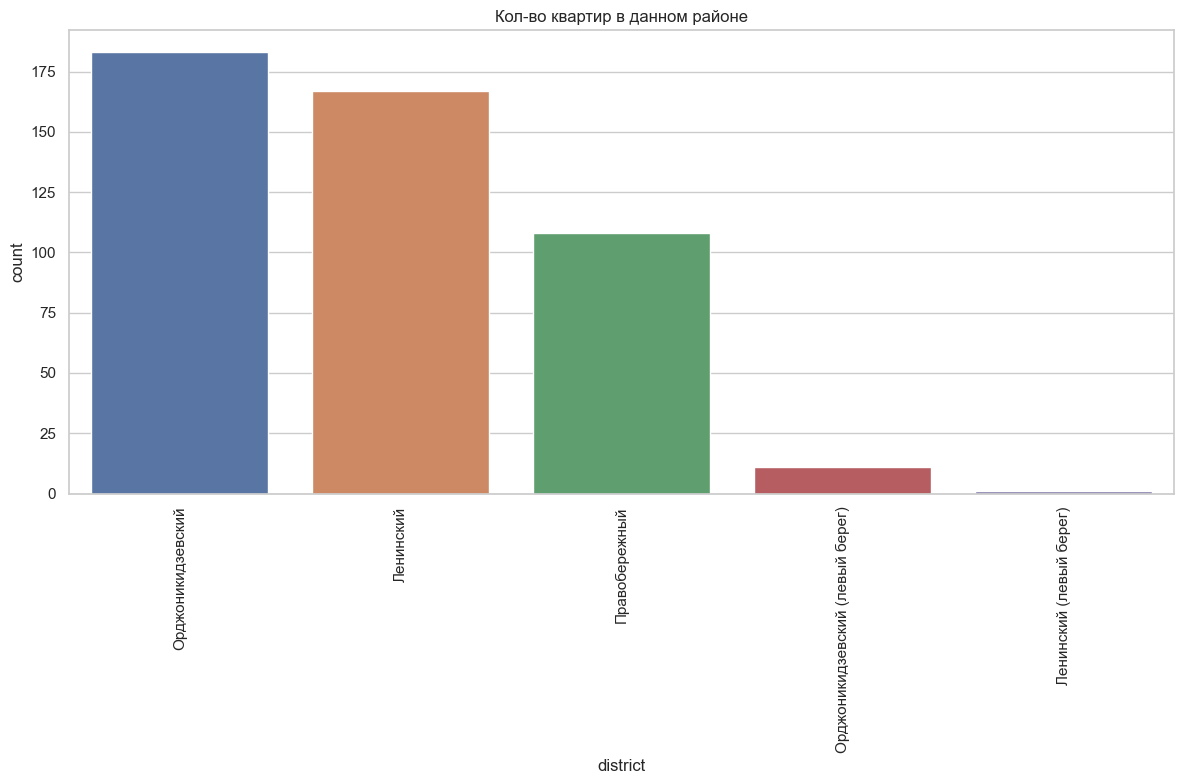

In [48]:
df_district_filled = apartments_data.fillna('Неизвестно')

plt.figure(figsize=(12, 8))

sns.set(style='whitegrid')
plt.title('Кол-во квартир в данном районе')

sns.countplot(x='district', data=df_district_filled, order=df_district_filled['district'].value_counts().index)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Кодирование районов  
Т.к. у нас мало квартир на левом берегу, прежде чем объединять их, следует проверить, какая средняя цена на квартиру в каждом районе

In [49]:
apartments_data.groupby('district')['price (thousand rubles)'].median()

district
Ленинский                          2850.0
Ленинский (левый берег)            1700.0
Орджоникидзевский                  3600.0
Орджоникидзевский (левый берег)    2300.0
Правобережный                      2875.0
Name: price (thousand rubles), dtype: float64

In [50]:
# Учитывая относительно небольшую разницу между ценами на квартиры в левобрежных районах,
# При кодировании их можно объединить
def set_district_category(district):
    if district == 'Ленинский':
        return 'Leninskiy'
    elif district == 'Орджоникидзевский':
        return 'Ordzhonikidzevskiy'
    elif district == 'Правобережный':
        return 'Pravoberezhniy'
    else:
        return 'Levoberezhniy'

In [51]:
# Создаем новые поля
apartments_data['district_cat'] = apartments_data['district'].apply(set_district_category)
districts_encoded = pd.get_dummies(apartments_data['district_cat'], prefix='district')
apartments_data = pd.concat([apartments_data, districts_encoded], axis=1)

In [52]:
# Удаляем лишние поля
apartments_data = apartments_data.drop(['address', 'comment', 'district', 'district_cat'], axis=1)

In [53]:
apartments_data.head()

,date_month,rooms,floor,square_all,square_living,square_kitchen,price (thousand rubles),agency,street_Lenina,street_Marksa,street_another,district_Leninskiy,district_Levoberezhniy,district_Ordzhonikidzevskiy,district_Pravoberezhniy
0,8,2,2/16,72.0,33.0,14.0,6200,РиоЛюкс,True,False,False,False,False,True,False
1,8,2,1/2,68.5,45.0,15.0,3330,NaN,False,False,True,True,False,False,False
2,8,2,5/5,46.0,29.0,6.0,3250,МАГНИТОГОРСК НЕДВИЖИМОСТЬ,False,False,True,False,False,False,True
3,8,3,4/5,60.2,48.0,6.0,3850,Агентство Недвижимости Ключи,False,False,True,False,False,False,True
4,8,2,4/4,57.0,35.0,9.0,3550,NaN,False,False,True,True,False,False,False


## Этаж

In [54]:
# Формируем 2 новых признака посредством разделения признака 'floor'
apartments_data['apartment_floor'] = apartments_data['floor'].apply(lambda x: x.split('/')[0])
apartments_data['house_floors'] = apartments_data['floor'].apply(lambda x: x.split('/')[1])
apartments_data = apartments_data.drop('floor', axis=1)
apartments_data.head()

,date_month,rooms,square_all,square_living,square_kitchen,price (thousand rubles),agency,street_Lenina,street_Marksa,street_another,district_Leninskiy,district_Levoberezhniy,district_Ordzhonikidzevskiy,district_Pravoberezhniy,apartment_floor,house_floors
0,8,2,72.0,33.0,14.0,6200,РиоЛюкс,True,False,False,False,False,True,False,2,16
1,8,2,68.5,45.0,15.0,3330,NaN,False,False,True,True,False,False,False,1,2
2,8,2,46.0,29.0,6.0,3250,МАГНИТОГОРСК НЕДВИЖИМОСТЬ,False,False,True,False,False,False,True,5,5
3,8,3,60.2,48.0,6.0,3850,Агентство Недвижимости Ключи,False,False,True,False,False,False,True,4,5
4,8,2,57.0,35.0,9.0,3550,NaN,False,False,True,True,False,False,False,4,4


## Агенство

In [55]:
np.sort(apartments_data['agency'].unique().astype(str))

array(['" СИГМА "', '"ХИЖИНА", Сеть Риелторских Агентств', '"Шанс"',
       'California', 'nan', 'АН "XXI век"', 'АН «Монтера Курорт»',
       'АН Династия 24', 'Агентство "ЮРС"',
       'Агентство Недвижимости Ключи', 'Визит', 'Выбор', 'Империя жилья',
       'Ипотечный сервис', 'КОМФОРТ', 'Компания Дом',
       'МАГНИТОГОРСК НЕДВИЖИМОСТЬ', 'МУСТАНГ',
       'Магнитогорский городской центр недвижимости', 'Монтера Курорт',
       'На Трёх Китах', 'Новоселы', 'Новые Технологии',
       'Оператор недвижимости Ключи', 'Рио-Люкс', 'РиоЛюкс', 'Статус-М',
       'Сто Квадратов', 'Т.С.К.', 'Формула недвижимости', 'ЦИК "Империя"',
       'ЦНиИ "АльфаДом"', 'Центральное'], dtype='<U43')

In [56]:
# Приведем некоторые названия агенств к соответствию
apartments_data['agency'] = apartments_data['agency'].replace({'Рио-Люкс': 'РиоЛюкс',
                                                               'Оператор недвижимости Ключи': 'Агентство Недвижимости Ключи'})
# Восстановим пропуски
apartments_data = apartments_data.fillna(value={'agency': 'Частное лицо'})
apartments_data

,date_month,rooms,square_all,square_living,square_kitchen,price (thousand rubles),agency,street_Lenina,street_Marksa,street_another,district_Leninskiy,district_Levoberezhniy,district_Ordzhonikidzevskiy,district_Pravoberezhniy,apartment_floor,house_floors
0,8,2,72.0,33.0,14.0,6200,РиоЛюкс,True,False,False,False,False,True,False,2,16
1,8,2,68.5,45.0,15.0,3330,Частное лицо,False,False,True,True,False,False,False,1,2
2,8,2,46.0,29.0,6.0,3250,МАГНИТОГОРСК НЕДВИЖИМОСТЬ,False,False,True,False,False,False,True,5,5
3,8,3,60.2,48.0,6.0,3850,Агентство Недвижимости Ключи,False,False,True,False,False,False,True,4,5
4,8,2,57.0,35.0,9.0,3550,Частное лицо,False,False,True,True,False,False,False,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,7,4,77.8,46.5,11.4,3650,АН Династия 24,True,False,False,True,False,False,False,3,3
466,8,3,74.0,56.0,9.0,5500,Формула недвижимости,False,False,True,True,False,False,False,5,5
467,6,2,42.5,29.0,6.0,2650,""" СИГМА """,False,False,True,False,False,False,True,5,5
468,8,2,50.0,30.0,9.0,3350,Новые Технологии,False,False,True,False,False,True,False,3,9


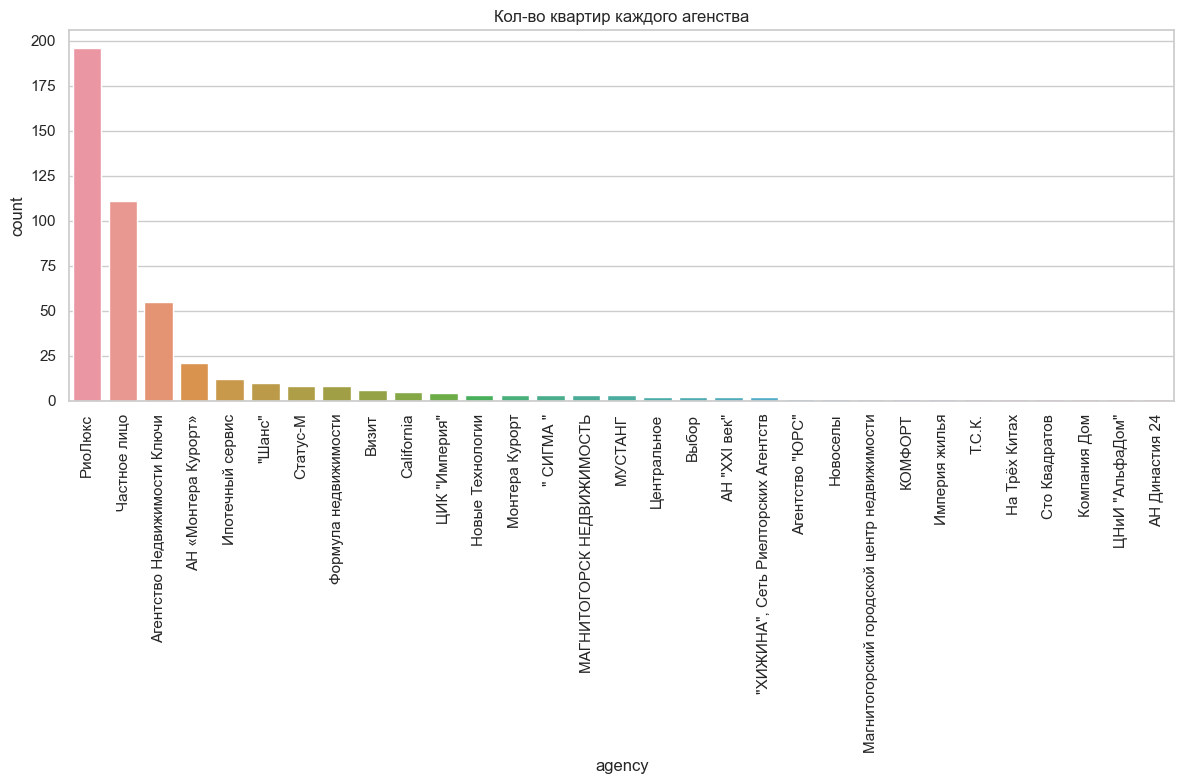

In [57]:
plt.figure(figsize=(12, 8))

sns.set(style='whitegrid')
plt.title('Кол-во квартир каждого агенства')

sns.countplot(x='agency', data=apartments_data, order=apartments_data['agency'].value_counts().index)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [58]:
def set_agency_category(agency):
    if agency == 'РиоЛюкс':
        return 'RioLuks'
    elif agency == 'Частное лицо':
        return 'Individual'
    elif agency == 'Агентство Недвижимости Ключи':
        return 'AN_Klyuchi'
    else:
        return 'another'

In [59]:
# Кодируем агентства с помощью OHE 
apartments_data['agency_cat'] = apartments_data['agency'].apply(set_agency_category)
agencies_encoded = pd.get_dummies(apartments_data['agency_cat'], prefix='agency')
apartments_data = pd.concat([apartments_data, agencies_encoded], axis=1)

In [60]:
# Удаляем ненужные поля
apartments_data = apartments_data.drop(['agency', 'agency_cat'], axis=1)

In [61]:
apartments_data

,date_month,rooms,square_all,square_living,square_kitchen,price (thousand rubles),street_Lenina,street_Marksa,street_another,district_Leninskiy,district_Levoberezhniy,district_Ordzhonikidzevskiy,district_Pravoberezhniy,apartment_floor,house_floors,agency_AN_Klyuchi,agency_Individual,agency_RioLuks,agency_another
0,8,2,72.0,33.0,14.0,6200,True,False,False,False,False,True,False,2,16,False,False,True,False
1,8,2,68.5,45.0,15.0,3330,False,False,True,True,False,False,False,1,2,False,True,False,False
2,8,2,46.0,29.0,6.0,3250,False,False,True,False,False,False,True,5,5,False,False,False,True
3,8,3,60.2,48.0,6.0,3850,False,False,True,False,False,False,True,4,5,True,False,False,False
4,8,2,57.0,35.0,9.0,3550,False,False,True,True,False,False,False,4,4,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,7,4,77.8,46.5,11.4,3650,True,False,False,True,False,False,False,3,3,False,False,False,True
466,8,3,74.0,56.0,9.0,5500,False,False,True,True,False,False,False,5,5,False,False,False,True
467,6,2,42.5,29.0,6.0,2650,False,False,True,False,False,False,True,5,5,False,False,False,True
468,8,2,50.0,30.0,9.0,3350,False,False,True,False,False,True,False,3,9,False,False,False,True


In [62]:
apartments_data.to_csv('apartments_data.csv', encoding='cp1251', index=False)